In [2]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from hydra import initialize, compose
from lenstronomy.Plots import plot_util as len_plot_util

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import overplot, plot, plot_util
from mejiro.lenses import lens_util
from mejiro.lenses.test import SampleStrongLens
from mejiro.helpers import lenstronomy_sim, pyhalo

In [3]:
array_dir = os.path.join(array_dir, 'sample_skypy_lens')
pickle_dir = config.machine.dir_03

In [4]:
lens, rgb_model, rgb_image = lens_util.get_sample(config.machine.dir_03, config.machine.dir_05, 48)

side = 10.01
lens.update_model()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


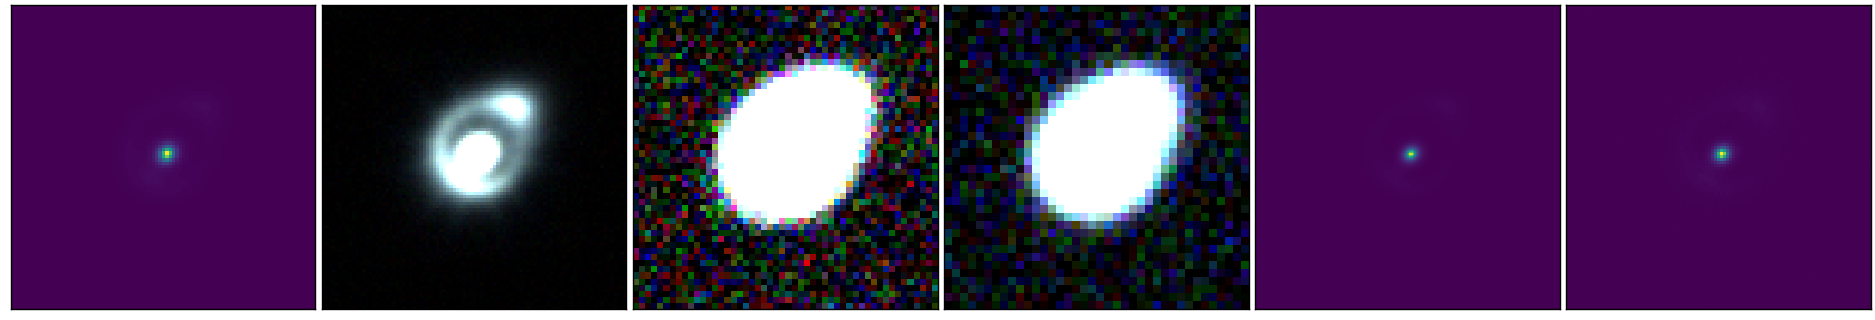

In [5]:
roman, _ = lenstronomy_sim.get_image(lens, 'roman', side)
roman_rgb, _ = lenstronomy_sim.get_image(lens, 'roman_rgb', side)
lsst, _ = lenstronomy_sim.get_image(lens, 'lsst', side)
des, _ = lenstronomy_sim.get_image(lens, 'des', side)
hst, _ = lenstronomy_sim.get_image(lens, 'hst', side)
euclid, _ = lenstronomy_sim.get_image(lens, 'euclid', side)

plot.plot_list([roman, roman_rgb, lsst, des, hst, euclid]) 

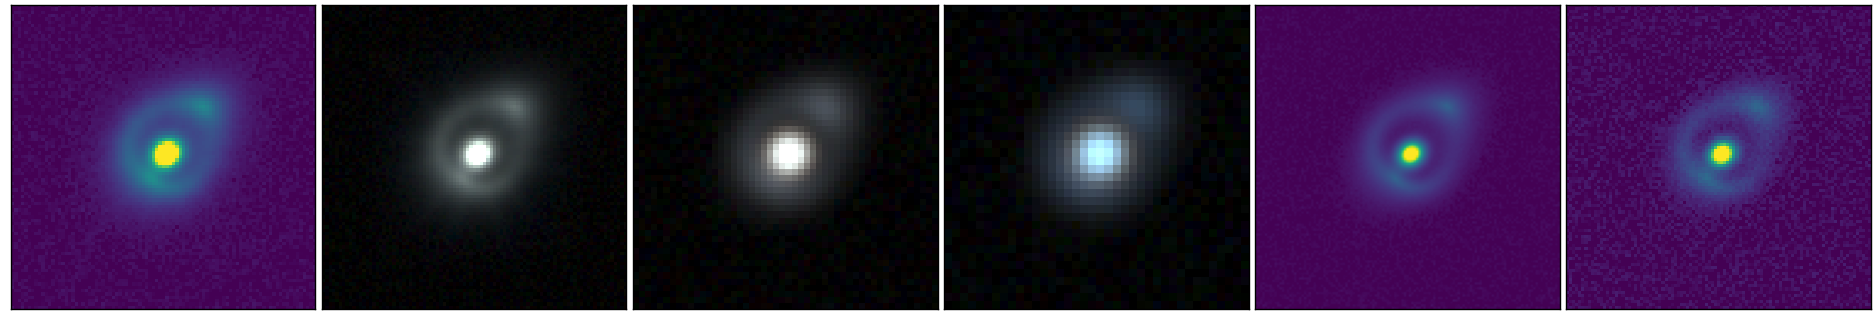

In [6]:
scale_max = 10

roman_scaled = len_plot_util.sqrt(roman, scale_min=0, scale_max=scale_max)
roman_rgb_scaled = len_plot_util.sqrt(roman_rgb, scale_min=0, scale_max=scale_max)
lsst_scaled = len_plot_util.sqrt(lsst, scale_min=0, scale_max=200)
des_scaled = len_plot_util.sqrt(des, scale_min=0, scale_max=100)
hst_scaled = len_plot_util.sqrt(hst, scale_min=0, scale_max=scale_max)
euclid_scaled = len_plot_util.sqrt(euclid, scale_min=0, scale_max=2)
# rgb_image = len_plot_util.sqrt(rgb_image, scale_min=0, scale_max=scale_max)

plot.plot_list([roman_scaled, roman_rgb_scaled, lsst_scaled, des_scaled, hst_scaled, euclid_scaled]) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


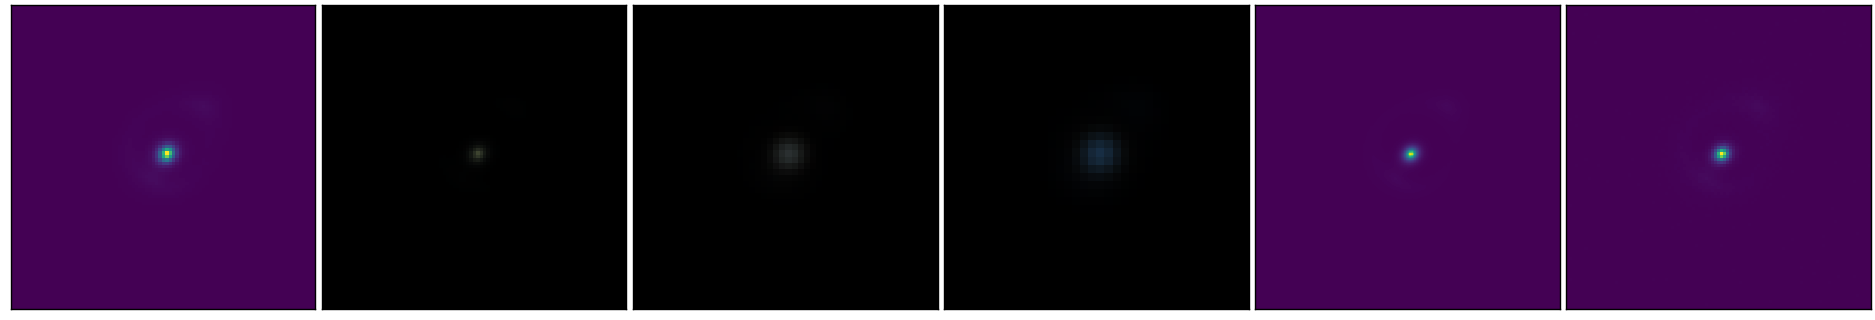

In [7]:
plot.plot_list([plot_util.normalize(roman), plot_util.normalize(roman_rgb), plot_util.normalize(lsst), plot_util.normalize(des), plot_util.normalize(hst), plot_util.normalize(euclid)]) 

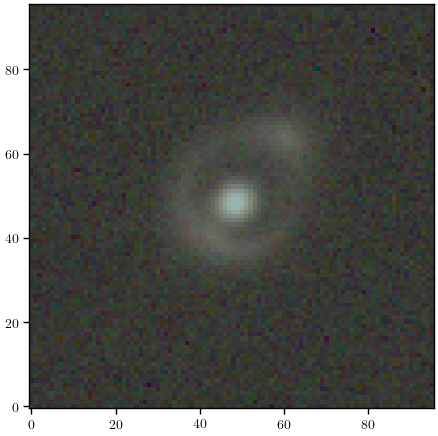

In [8]:
rgb_image_scaled = len_plot_util.sqrt(rgb_image.astype(float), scale_min=0, scale_max=500)
plt.imshow(rgb_image_scaled)
plt.show()

In [9]:
array_list = [rgb_image, lsst_scaled, euclid_scaled, hst_scaled]
title_list = ['Roman\n(F106, F129, F184)', 'LSST\n(g, r, i)', 'Euclid\n(VIS)', 'HST\n(WFC3 F160W)']

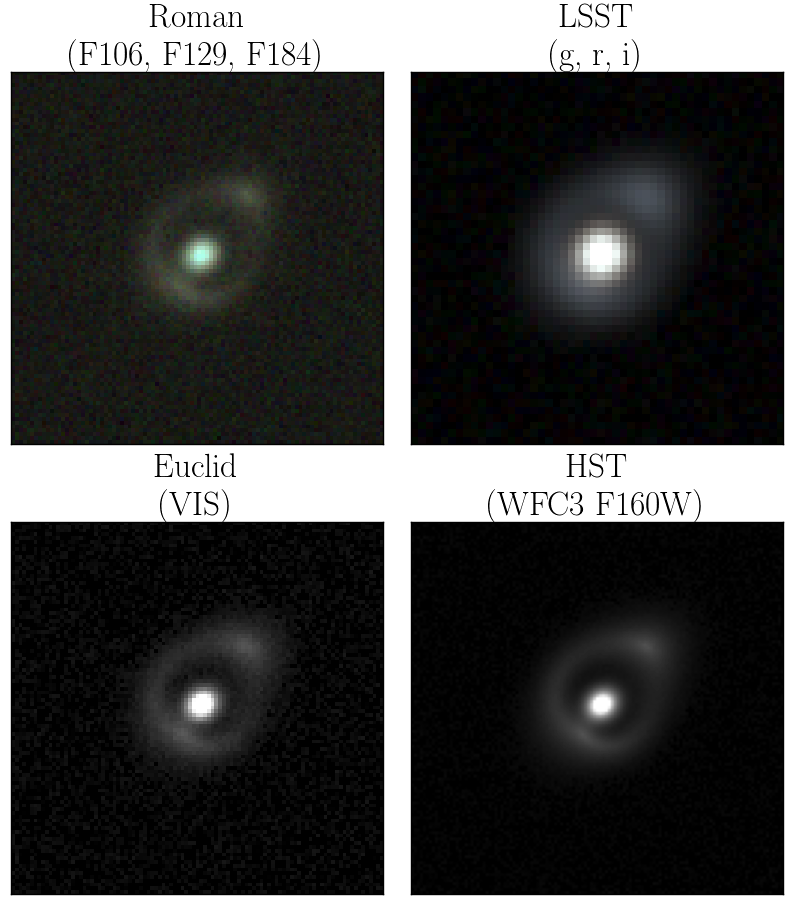

In [14]:
dim = 2

fontsize = 20
import matplotlib
matplotlib.rcParams.update({'font.size': fontsize})

fig, ax = plt.subplots(nrows=dim, ncols=dim, figsize=(8, 9), constrained_layout=True)

for i, array in enumerate(array_list):
    ax[i // dim, i % dim].imshow(array, cmap='gray')
    ax[i // dim, i % dim].get_xaxis().set_visible(False)
    ax[i // dim, i % dim].get_yaxis().set_visible(False)
    ax[i // dim, i % dim].set_title(title_list[i])

plt.savefig(os.path.join(figure_dir, 'telescope_compare.png'))
plt.show()

In [11]:
# dim = 2

# # fontsize = 18
# # import matplotlib
# # matplotlib.rcParams.update({'font.size': fontsize})

# fig, ax = plt.subplots(nrows=dim, ncols=dim)
# fig.set_figwidth(3.5)

# for i, array in enumerate(array_list):
#     ax[i // dim, i % dim].imshow(array, cmap='gray')
#     ax[i // dim, i % dim].get_xaxis().set_visible(False)
#     ax[i // dim, i % dim].get_yaxis().set_visible(False)
#     ax[i // dim, i % dim].set_title(title_list[i])

# plt.savefig(os.path.join(figure_dir, 'telescope_compare.png'))
# plt.show()

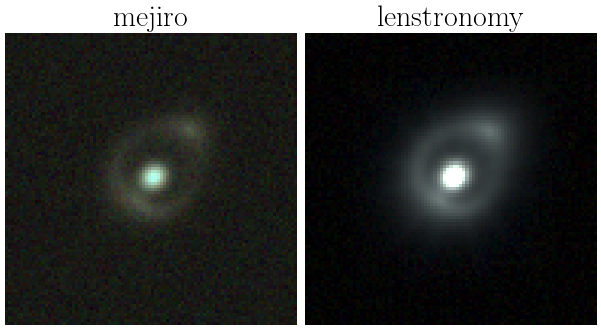

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3.5), constrained_layout=True)

ax[0].imshow(rgb_image)
ax[1].imshow(roman_rgb_scaled)

ax[0].set_title('mejiro')
ax[1].set_title('lenstronomy')

for each in ax: each.set_axis_off()

plt.savefig(os.path.join(figure_dir, 'mejiro_lenstronomy_compare.png'))
plt.show()